**original Source : https://github.com/pytorch/examples/mnist/main.py**

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57910000 @  0x7f43eb3532a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [2]:
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.5854, 0.4931, 0.5230],
        [0.6491, 0.4863, 0.0886],
        [0.3866, 0.3015, 0.6196],
        [0.0560, 0.6150, 0.9908],
        [0.0174, 0.3519, 0.5809]])


In [3]:
torch.cuda.is_available()

True

In [0]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random
from torch.autograd import Variable
%matplotlib inline

# **Net class setting**

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# **train and test set**

In [0]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

## def main

In [8]:

use_cuda = True

torch.manual_seed(1)

device = torch.device("cuda") 

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)


model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

for epoch in range(1, 11):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

if (False):
    torch.save(model.state_dict(),"mnist_cnn.pt")

Processing...
Done!
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300039
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.438883
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.366815
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.327680
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.224536
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.337847
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.063525
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.118217
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.145159
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.118076

Test set: Average loss: 0.1022, Accuracy: 9659/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.147755
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.099380
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.058941
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.065016
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.120885
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.034197
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.034373
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.038155
Train Epoch: 2 [51200/60000 (85

In [0]:
with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

image idx :  3140
target value : 4
predict value : 4


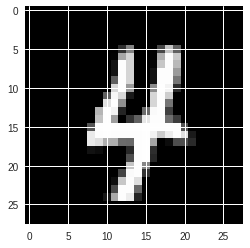

In [28]:
idx = random.randrange(0,len(data))
image = Variable(data[idx].view(-1,28*28).float())
print('image idx : ', idx)
print('target value :' ,target[idx].item())
print('predict value :',pred[idx].item())
plt.imshow(image.data.view(28,28).cpu().numpy(), cmap='gray')